In [12]:
!pip install fitdecode
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import matplotlib.dates as md
plt.rcParams['figure.figsize'] = [20, 6]
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 14})

In [2]:
fit_files = glob.glob(os.path.join(...))
dataframe_name = "data.csv"

if fit_files is not None:
    from kipchoge import Kipchoge
    kipchoge = Kipchoge(fit_files)
    #kipchoge.analyze()
    kipchoge.as_dataframe(dataframe_name, start_date="2023-11-22", end_date="2023-11-28")

  0%|          | 0/353 [00:00<?, ?it/s]/Users/damian/Code/not_couch_potato/kipchoge.py:156: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  raw_dataframe = raw_dataframe.interpolate(method='linear', limit_direction='both')
  7%|▋         | 25/353 [00:17<02:52,  1.90it/s]/Users/damian/Code/not_couch_potato/kipchoge.py:156: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  raw_dataframe = raw_dataframe.interpolate(method='linear', limit_direction='both')
 14%|█▍        | 49/353 [00:44<06:29,  1.28s/it]/Users/damian/Code/not_couch_potato/kipchoge.py:156: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  raw_dataframe = raw_data

In [3]:
df = pd.read_csv(dataframe_name)
# sort by timestamp
df = df.sort_values(by=['timestamp'])
# timestamp up to minutes
df['timestamp'] = [pd.to_datetime(date) for date in df['timestamp']]
# remove outliers from enhanced_speed (m/s) (values that are 3 std away from mean)
df = df[np.abs(df['enhanced_speed (m/s)'] - df['enhanced_speed (m/s)'].mean()) <= (3 * df['enhanced_speed (m/s)'].std())]
# convert column 'enhanced_speed (m/s)' to min/km
df['enhanced_speed (min/km)'] = 1 / df['enhanced_speed (m/s)'] * 1000 / 60
# convert column 'position_lat (semicircles)' and 'position_long (semicircles)' to degrees
df["position_long (degrees)"] = (df["position_long (semicircles)"] * 180)/ 2**31
df["position_lat (degrees)"] = (df["position_lat (semicircles)"] * 180)/ 2**31

In [4]:
def two_axis_plot(df, x_name, y1_name, y2_name = None, x_c = 'black', y1_c = 'r', y2_c= 'b', alpha = 0.1):
    """
    Plot two variables with different scales on the same plot.
    """
    x, y1 = df[x_name], df[y1_name]

    fig, ax1 = plt.subplots()

    ax1.set_xlabel(x_name, color=x_c)
    ax1.set_ylabel(y1_name, color=y1_c)
    ax1.scatter(x, y1, c=y1_c, s = 2, alpha=alpha)

    if y2_name:
        # instantiate a second axes that shares the same x-axis
        y2 = df[y2_name]
        ax2 = ax1.twinx()
        ax2.set_ylabel(y2_name, color=y2_c)
        ax2.scatter(x, y2, color=y2_c, s =2, alpha=alpha)
        ax2.tick_params(axis='y', labelcolor=y2_c)
        fig.tight_layout()

    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.xticks(rotation=25)
    ax1.xaxis.set_major_formatter(xfmt)
    plt.show()

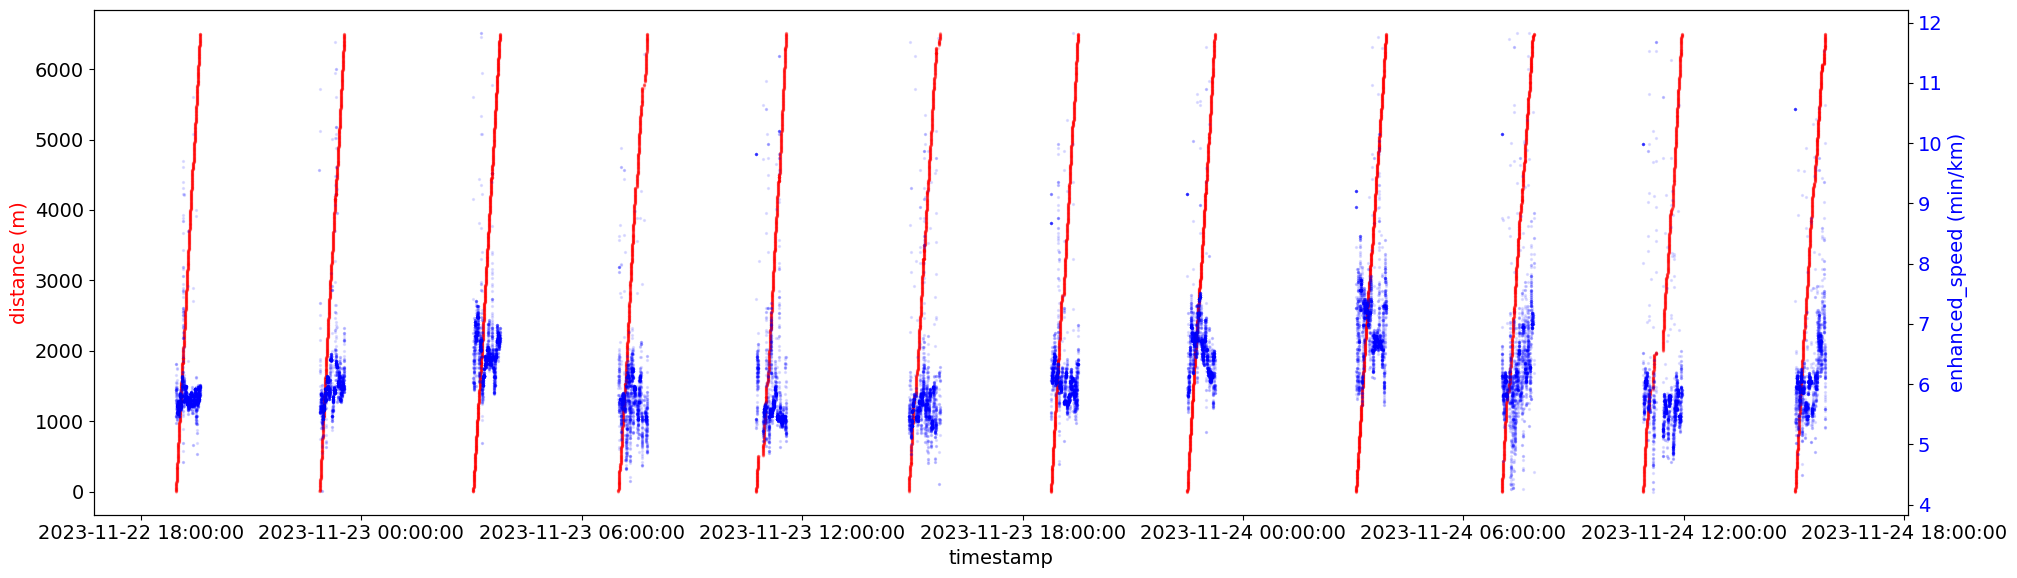

In [5]:
two_axis_plot(df, 'timestamp', 'distance (m)', 'enhanced_speed (min/km)')

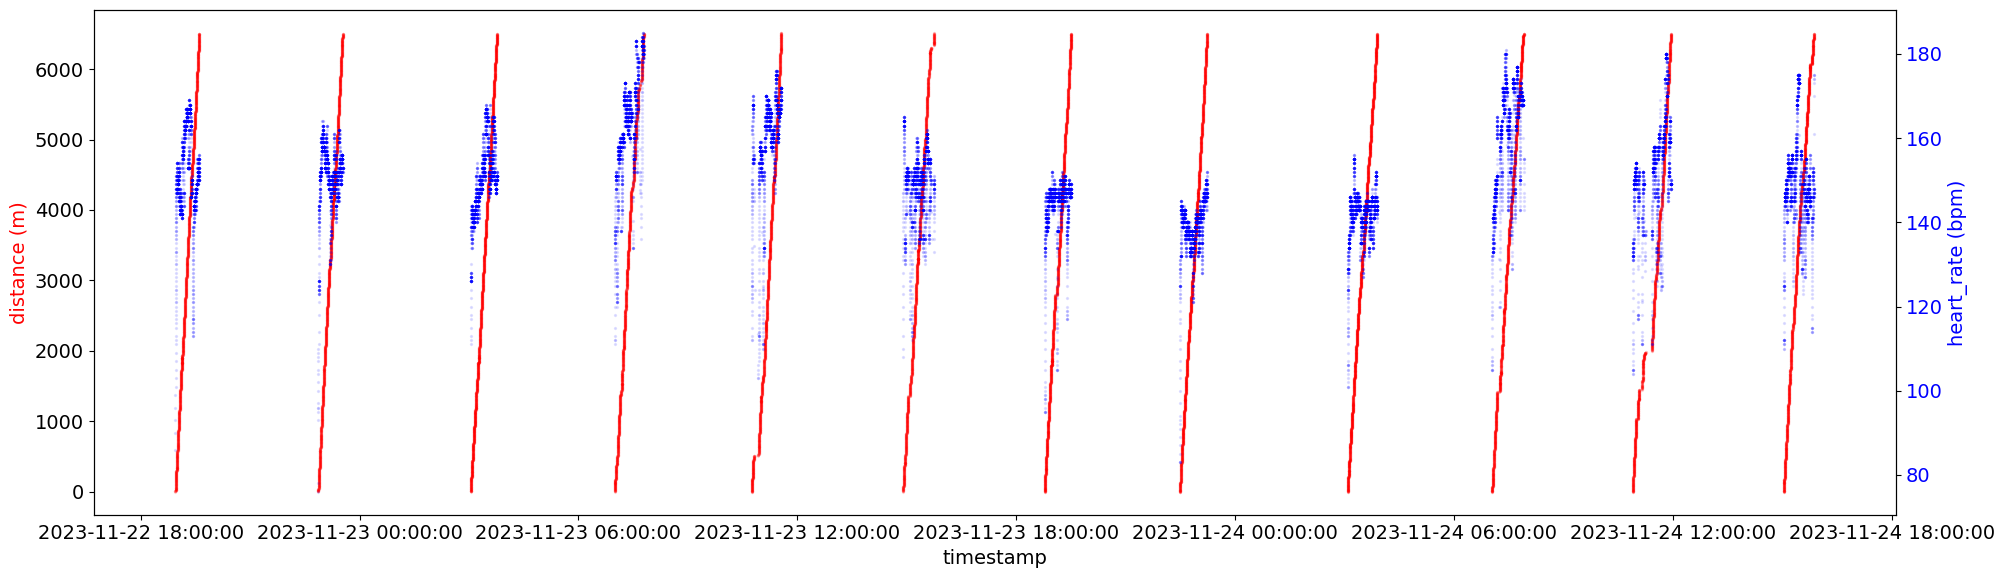

In [6]:
two_axis_plot(df, 'timestamp', 'distance (m)', 'heart_rate (bpm)')

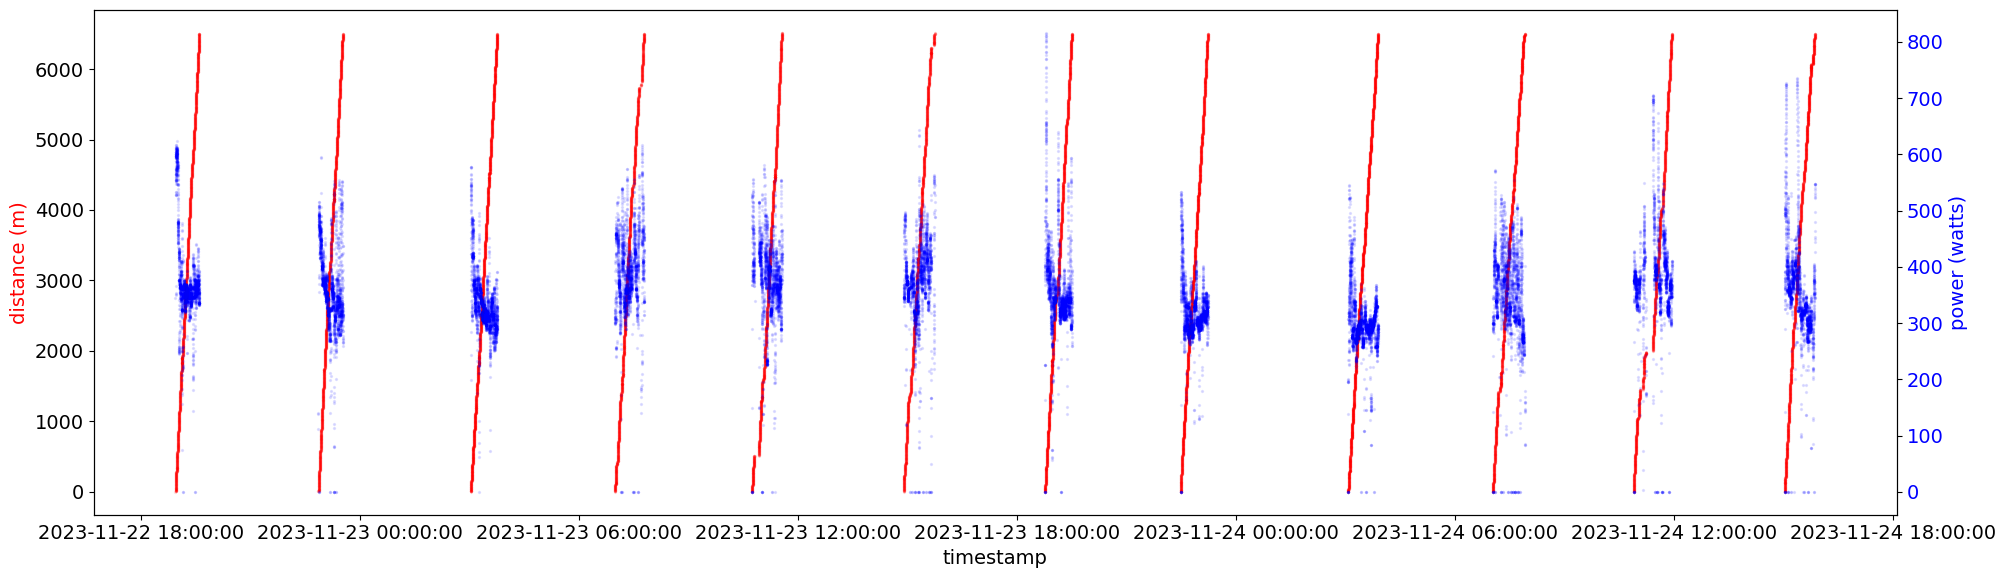

In [7]:
two_axis_plot(df, 'timestamp', 'distance (m)', 'power (watts)')

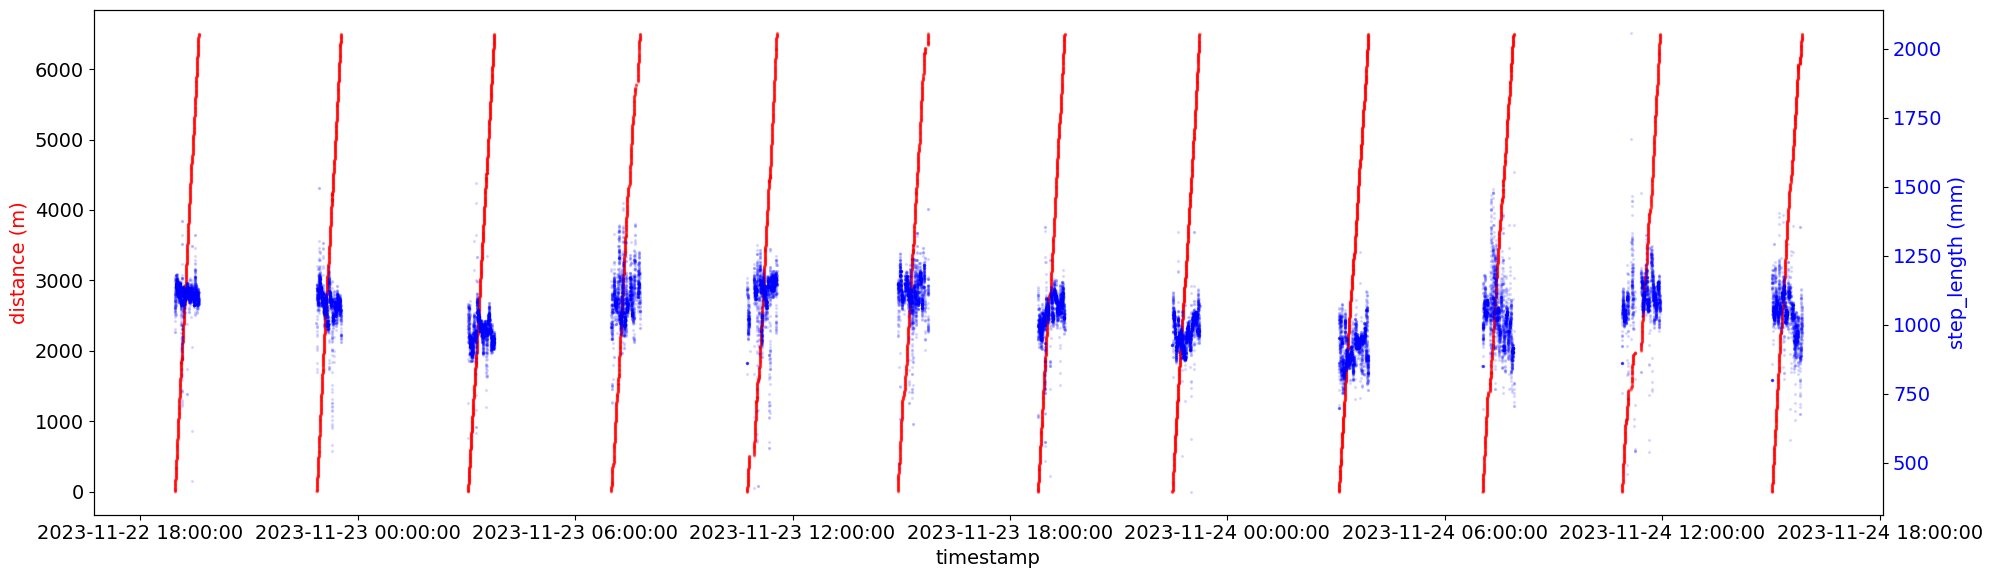

In [8]:
two_axis_plot(df, 'timestamp', 'distance (m)', 'step_length (mm)')

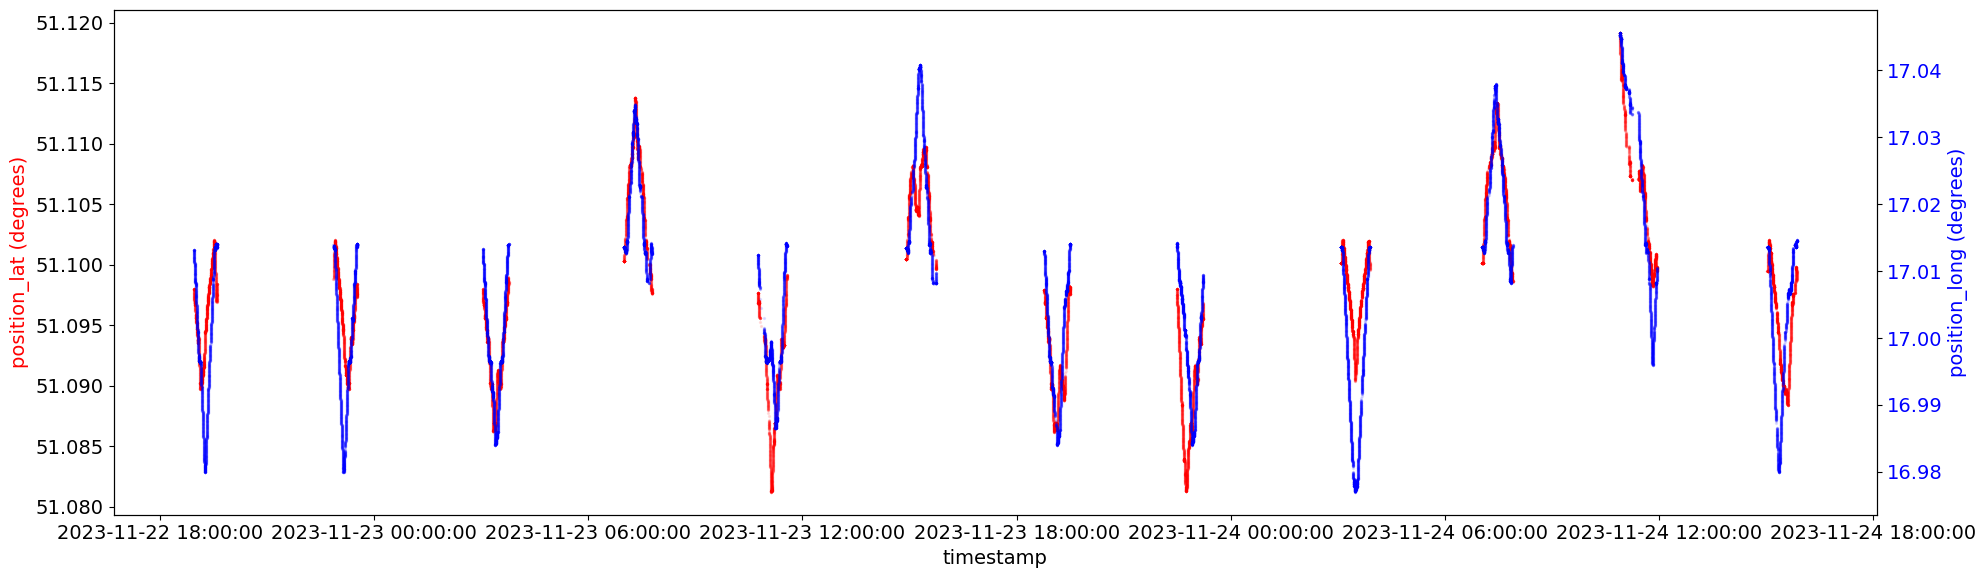

In [9]:
two_axis_plot(df, 'timestamp', 'position_lat (degrees)', 'position_long (degrees)')